In [17]:
# import the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model



In [18]:
#load the data set
df=pd.read_csv("CCPP.csv")
df.head()


,AT,V,AP,RH,PE
0,14.96,41.76,1024.07,73.17,463.26
1,25.18,62.96,1020.04,59.08,444.37
2,5.11,39.40,1012.16,92.14,488.56
3,20.86,57.32,1010.24,76.64,446.48
4,10.82,37.50,1009.23,96.62,473.90


In [19]:
import math
median_AT=math.floor(df.AT.median())
median_V=math.floor(df.V.median())
median_AP=math.floor(df.AP.median())
median_RH=math.floor(df.RH.median())

df.AT=df.AT.fillna(median_AT)
df.V=df.V.fillna(median_V)
df.AP=df.AP.fillna(median_AP)
df.RH=df.RH.fillna(median_RH)

In [20]:
#getting statistical data
df.describe()

,AT,V,AP,RH,PE
count,9568.000000,9568.000000,9568.000000,9568.000000,9568.000000
mean,19.651231,54.305804,1013.259078,73.308978,454.365009
std,7.452473,12.707893,5.938784,14.600269,17.066995
min,1.810000,25.360000,992.890000,25.560000,420.260000
25%,13.510000,41.740000,1009.100000,63.327500,439.750000
50%,20.345000,52.080000,1012.940000,74.975000,451.550000
75%,25.720000,66.540000,1017.260000,84.830000,468.430000
max,37.110000,81.560000,1033.300000,100.160000,495.760000


In [21]:
corr =df.corr()
corr['PE']


AT   -0.948128
V    -0.869780
AP    0.518429
RH    0.389794
PE    1.000000
Name: PE, dtype: float64

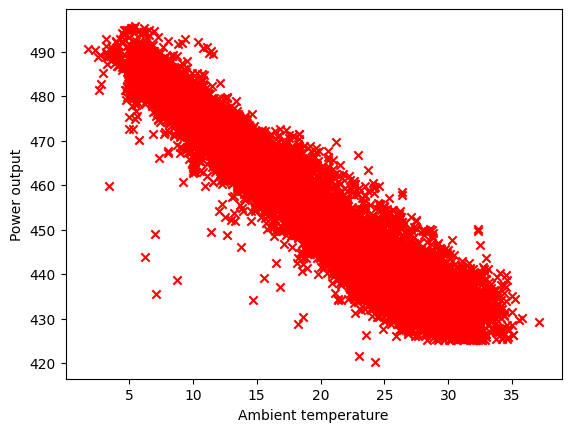

In [26]:
#AT(ambient temperature) VS PE(power output)
plt.xlabel('Ambient temperature')
plt.ylabel('Power output')
plt.scatter(df.AT,df.PE,color='red',marker='x')


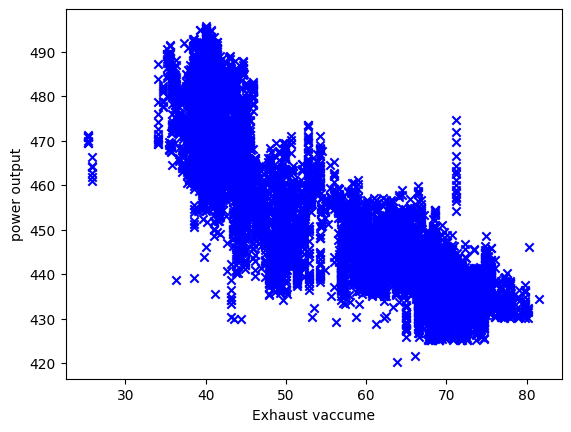

In [27]:
#V(Exhaust vaccume) Vs PE(power output)
plt.xlabel('Exhaust vaccume')
plt.ylabel('power output')
plt.scatter(df.V,df.PE,color='blue',marker='x')

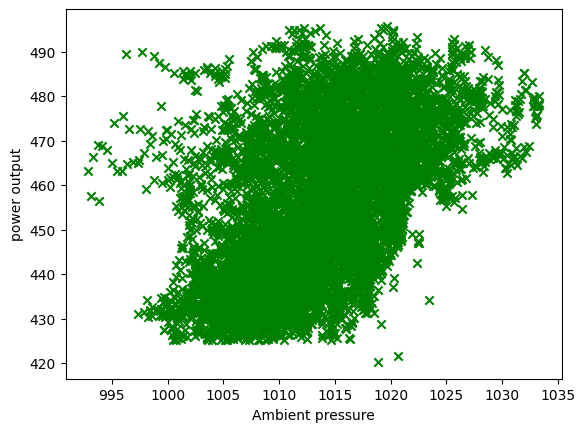

In [ ]:
#AP(Ambient pressure) Vs PE(power output)
plt.xlabel('Ambient pressure')
plt.ylabel('power output')
plt.scatter(df.AP,df.PE,color='green',marker='x')

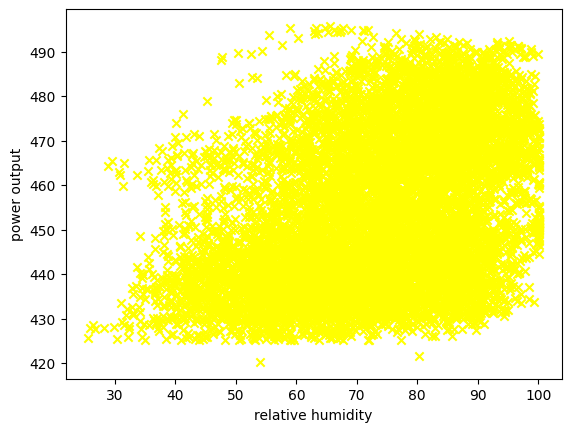

In [31]:
#RH(relative humidity) Vs PE(power output)
plt.xlabel('relative humidity')
plt.ylabel('power output')
plt.scatter(df.RH,df.PE,color='yellow',marker='x')

In [52]:
from sklearn.model_selection import train_test_split
x=df[['AT','V','AP','RH']]
y=df['PE']
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2)


In [53]:
#Linear regreesion MOdel

reg = linear_model.LinearRegression()
reg.fit(x_train,y_train)


,"fit_intercept fit_intercept: bool, default=TrueWhether to calculate the intercept for this model. If setto False, no intercept will be used in calculations(i.e. data is expected to be centered).",True
,"copy_X copy_X: bool, default=TrueIf True, X will be copied; else, it may be overwritten.",True
,"tol tol: float, default=1e-6The precision of the solution (`coef_`) is determined by `tol` whichspecifies a different convergence criterion for the `lsqr` solver.`tol` is set as `atol` and `btol` of :func:`scipy.sparse.linalg.lsqr` whenfitting on sparse training data. This parameter has no effect when fittingon dense data... versionadded:: 1.7",1e-06
,"n_jobs n_jobs: int, default=NoneThe number of jobs to use for the computation. This will only providespeedup in case of sufficiently large problems, that is if firstly`n_targets > 1` and secondly `X` is sparse or if `positive` is setto `True`. ``None`` means 1 unless in a:obj:`joblib.parallel_backend` context. ``-1`` means using allprocessors. See :term:`Glossary ` for more details.",None
,"positive positive: bool, default=FalseWhen set to ``True``, forces the coefficients to be positive. Thisoption is only supported for dense arrays.For a comparison between a linear regression model with positive constraintson the regression coefficients and a linear regression without such constraints,see :ref:`sphx_glr_auto_examples_linear_model_plot_nnls.py`... versionadded:: 0.24",False


In [54]:
reg.coef_,reg.intercept_

(array([-1.98063216, -0.23135179,  0.06091456, -0.16203247]),
 np.float64(456.0109310847709))

In [55]:
reg.score(x_train,y_train)


0.9294929348654117

In [56]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error


In [ ]:
y_pred =reg.predict(x_test)


In [59]:
r2 =r2_score(y_test,y_pred)
rmse=np.sqrt(mean_squared_error(y_test,y_pred))
mae= mean_absolute_error(y_test,y_pred)

In [60]:
print("Linear regrresion Performance")
print("-----------------------------------")
print(f"MAE  : {mae}")
print(f"RMSE : {rmse}")
print(f"R²   : {r2}")

Linear regrresion Performance
-----------------------------------
MAE  : 3.6756850460835255
RMSE : 4.650039436663209
R²   : 0.9253864551566364


In [61]:
reg.predict([[21.96,59.8,1016.72,72.6]])

c:\Users\-e-\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\utils\validation.py:2691: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([448.85091045])